# EDA - Venta de Coches (USA)

<img alt = "ALT" src = "recursos_visuales/img1.jpeg">

### Instalación de Librerías básicas para la gestión de datos

In [2]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc


### Modelos
from xgboost import XGBClassifier, plot_importance

c:\Users\diego\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Cargamos el csv en un dataframe

df = pd.read_csv("Dataset/car_prices.csv")

In [4]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
import math

def assign_color(value):
    # Convertir a mayúsculas para una comparación uniforme (opcional)
     #value = value.strip().lower()

    # Asignar valores a los colores
    if value in {'4802', '2846', '339', '20627', '12655', 'white'}:  # Verificar valor vacío en caso de NaN
        return int(1)  # blanco
    elif value in {'16633', '6158', '5705', '-', 'gray'}:
        return int(2)  # gris
    elif value in {'6388', 'black'}:
        return int(3)  # negro
    elif value in {'11034', 'red'}:
        return int(4)  # rojo
    elif value in {'2711', 'silver'}:
        return int(5)  # plata
    elif value in {'2817', 'blue'}:
        return int(6)  # azul
    elif value in {'9410', '1167', '14872', 'brown'}:
        return int(7)  # marrón
    elif value in {'9887', '2846', 'beige'}:
        return int(8)  # beige
    elif value in {'18561', '9562', '5001', 'purple'}:
        return int(9)  # púrpura
    elif value in {'721', '2711', 'burgundy'}:
        return int(10)  # burdeos
    elif value in {'gold', '2172'}:
        return int(11)  # oro
    elif value in {'yellow', '18384', '9837', '20379', '15719', '6864'}:
        return int(12)  # amarillo
    elif value == 'green':
        return int(13)  # verde
    elif value == 'charcoal':
        return int(14)  # carbón
    elif value == 'orange':
        return int(15)  # naranja

    return None

In [6]:
df['color_numeric'] = df['color'].apply(assign_color)

In [7]:
df['color_numeric'] = df['color_numeric'].replace(r'^\s*$', np.nan, regex=True).fillna(4)
df['color_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: color_numeric
Non-Null Count   Dtype  
--------------   -----  
558837 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [8]:
total_states = df["state"].unique()

print(total_states)

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'pr' 'or' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' '3vwd17aj4fm201708' 'ns'
 '3vwd17aj2fm258506' '3vwd17aj3fm276741' '3vwd17aj2fm285365'
 '3vwd17aj0fm227318' '3vwd17aj6fm218641' '3vwd17aj7fm223475'
 '3vwd17aj5fm297123' '3vwd17aj5fm219943' '3vwd17aj9fm219766'
 '3vwd17aj3fm259017' '3vwd17aj5fm206111' '3vwd17aj5fm273601'
 '3vwd17aj5fm221322' '3vwd17aj5fm268964' '3vwd17aj6fm231972'
 '3vwd17aj7fm222388' '3vwd17aj7fm218440' '3vwd17ajxfm315938'
 '3vwd17aj7fm229552' '3vwd17aj8fm298895' '3vwd17aj4fm236636'
 '3vwd17aj5fm225953' '3vwd17aj7fm326640' '3vwd17aj8fm239622'
 '3vwd17aj2fm261566']


In [9]:
#Creamos un array con los estados ya sean de EEUU, CA o PR validos en la columna state
array_states = ['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj', 'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut', 'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on', 'ok', 'ms', 'nm', 'al']

#Obviamos el resto de valores ya que no refieren a ningun lugar geografico

print(len(array_states))

37


In [10]:
#A continuacion vamos a referencia cada estado con un numero del 0 al 37. Siendo el 0 para aquellos valores que no refieren a ningun estado válido

def assing_state(value):
    if value not in array_states:
        return int(0) #Devolvemos 0 para aquellos que no esten en el array de estados
    elif value in array_states:
        counter = 1
        for state in array_states: 
            if state == value:
                return int(counter)
            else:
                counter += 1

In [11]:
#Aplicamos a la columna de 'state' nuestra funcion y revisamos que todo este correcto

df['states_numeric'] = df['state'].apply(assing_state)

df['states_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: states_numeric
Non-Null Count   Dtype
--------------   -----
558837 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


Como podemos observar tiene valores del 0 al 37 como bien habíamos planteado anteriormente


In [12]:
df['make'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: make
Non-Null Count   Dtype 
--------------   ----- 
548536 non-null  object
dtypes: object(1)
memory usage: 4.3+ MB


In [13]:
df['make'] = df['make'].astype(str).replace('nan', 'none')
df['make'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: make
Non-Null Count   Dtype 
--------------   ----- 
558837 non-null  object
dtypes: object(1)
memory usage: 4.3+ MB


In [14]:
array_brands = ['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford', 
 'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti', 
 'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini', 
 'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota', 
 'subaru', 'scion', 'porsche', 'none', 'dodge', 'fiat', 
 'chrysler', 'ferrari', 'honda', 'ram', 'smart', 
 'bentley', 'pontiac', 'saturn', 'maserati', 'mercury', 
 'hummer', 'landrover', 'mercedes', 'saab', 'suzuki', 
 'oldsmobile', 'isuzu', 'dodge tk', 'geo', 'rolls-royce', 
 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw', 'daewoo', 
 'chev truck', 'ford tk', 'plymouth', 'ford truck', 'tesla', 
 'airstream', 'dot', 'aston martin', 'fisker', 'lamborghini', 'lotus']

#Obviamos los gmc, para que todas las variantes de GMC sean valor igual a 0


In [15]:
def assign_brand(value):
    if value.lower() not in array_brands:
        return int(0)
    elif value in array_brands:
        counter = 1
        for brand in array_brands:
            if brand == value.lower():
                return int(counter)
            else:
                counter += 1


In [16]:
def tolower(value):
    return value.lower()

df['make']=df['make'].apply(tolower)

In [17]:
df['make_numeric'] =df['make'].apply(assign_brand)
df['make_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: make_numeric
Non-Null Count   Dtype
--------------   -----
558837 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


## Creamos un DataFrame con los datos que vamos a usar


In [18]:
cars = df[['year','make_numeric','condition','odometer','color_numeric','states_numeric','mmr','sellingprice']]

In [19]:
cars.describe()

,year,make_numeric,condition,odometer,color_numeric,states_numeric,mmr,sellingprice
count,558837.000000,558837.000000,547017.000000,558743.000000,558837.000000,558837.000000,558799.000000,558825.000000
mean,2010.038927,13.497061,30.672365,68320.017767,3.870198,10.243890,13769.377495,13611.358810
std,3.966864,10.486573,13.402832,53398.542821,2.712219,7.828328,9679.967174,9749.501628
min,1982.000000,0.000000,1.000000,1.000000,1.000000,0.000000,25.000000,1.000000
25%,2007.000000,5.000000,23.000000,28371.000000,2.000000,3.000000,7100.000000,6900.000000
50%,2012.000000,8.000000,35.000000,52254.000000,3.000000,9.000000,12250.000000,12100.000000
75%,2013.000000,23.000000,42.000000,99109.000000,5.000000,15.000000,18300.000000,18200.000000
max,2015.000000,65.000000,49.000000,999999.000000,15.000000,37.000000,182000.000000,230000.000000


In [20]:
target = 'sellingprice'
car_features = list(cars.columns)

car_features.remove(target)
print(car_features)

['year', 'make_numeric', 'condition', 'odometer', 'color_numeric', 'states_numeric', 'mmr']


In [21]:
cars.drop(target, axis = 1).isin([0]).sum()

year                  0
make_numeric      10649
condition             0
odometer              0
color_numeric         0
states_numeric       87
mmr                   0
dtype: int64

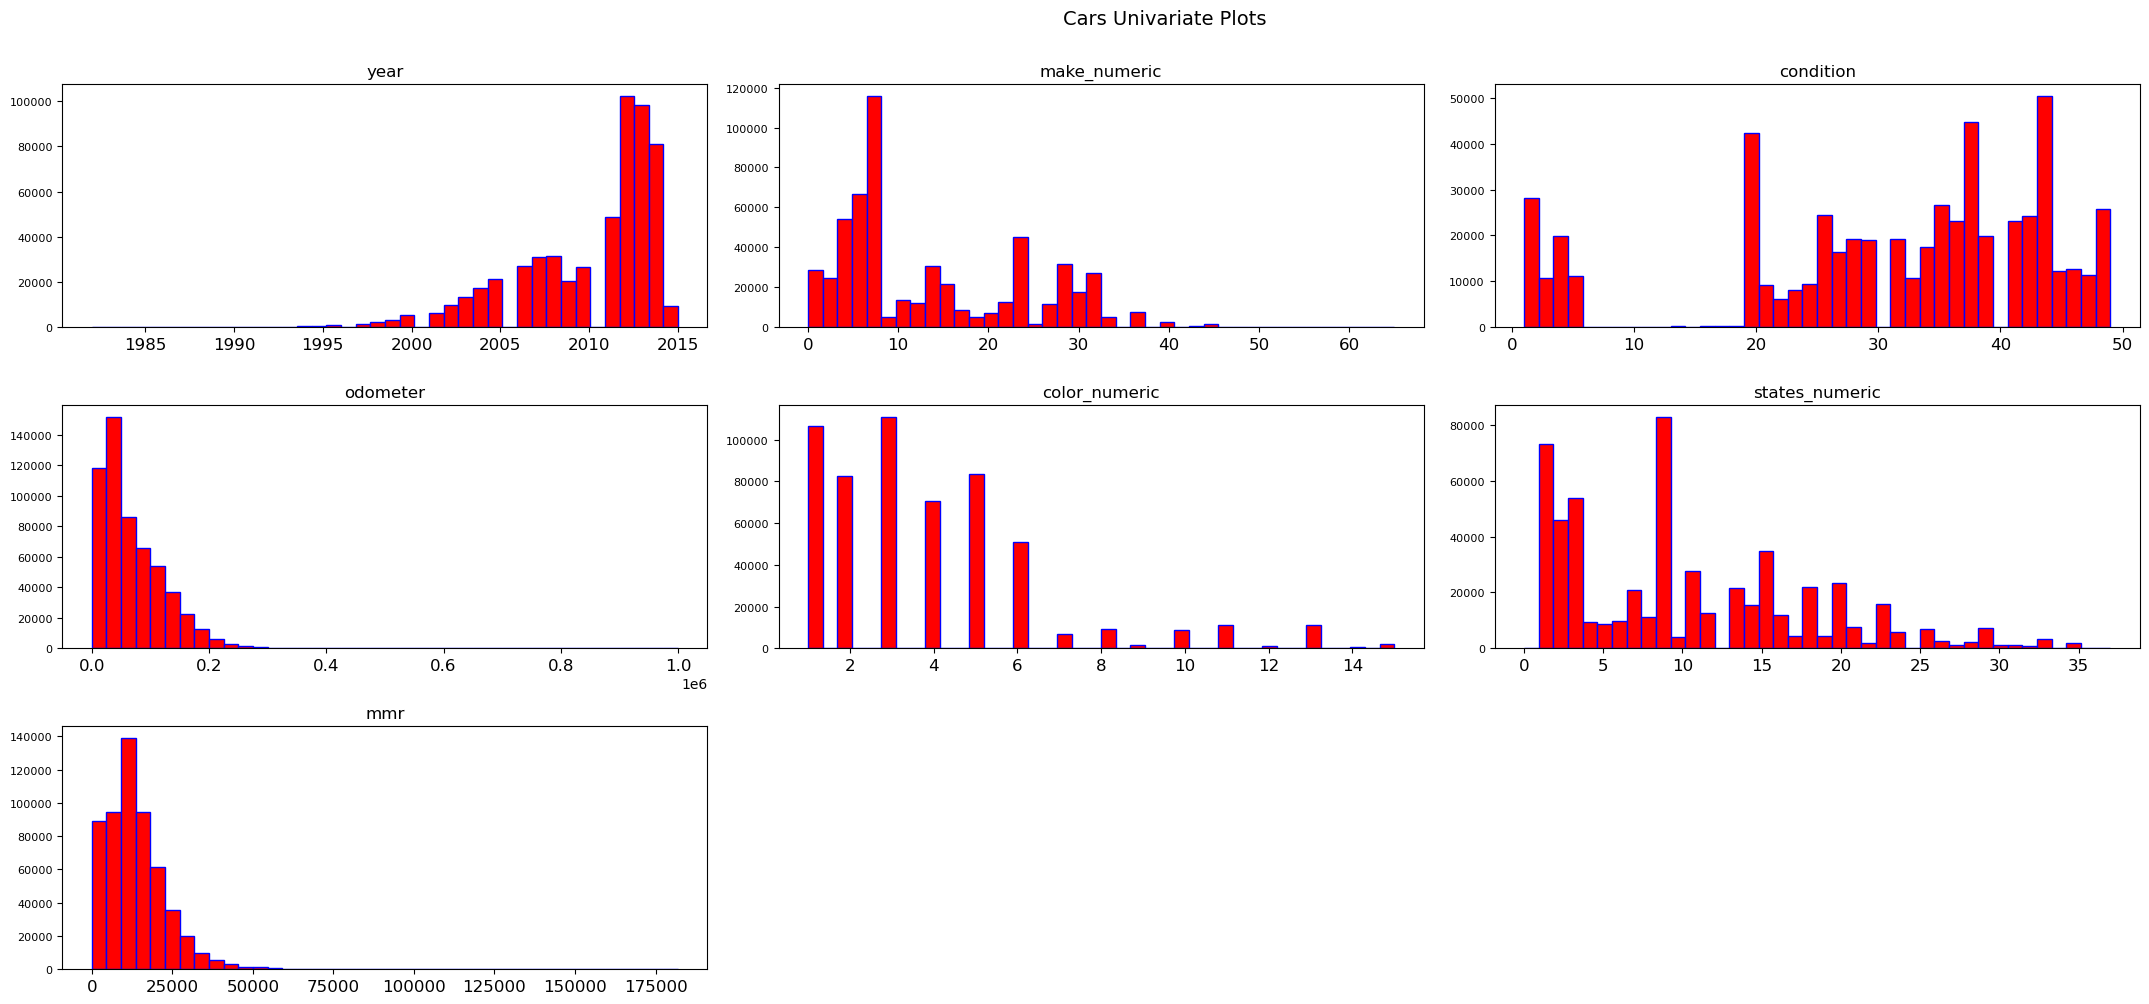

In [22]:
cars[car_features].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=12, ylabelsize=8, grid=False, 
                          figsize=(18,8), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Cars Univariate Plots', x=0.65, y=1.25, fontsize=14);

### Distribución de los precios de venta

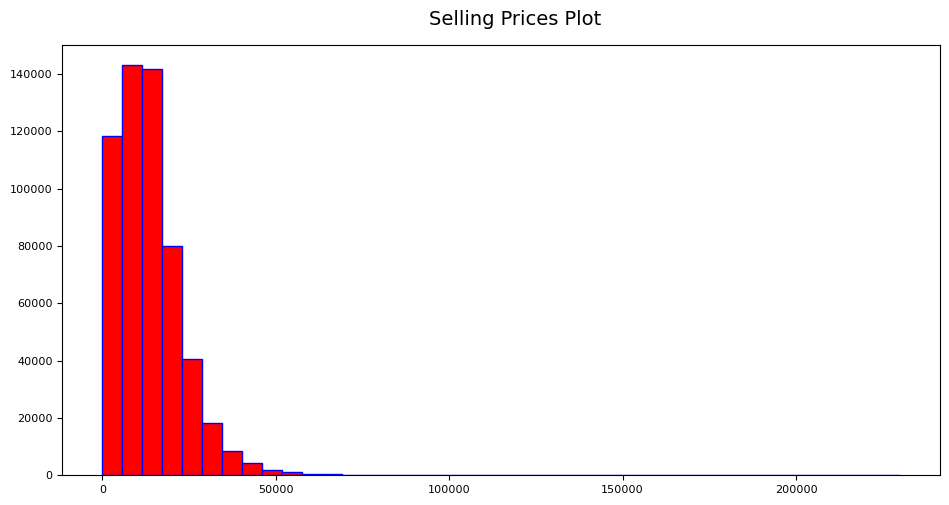

In [23]:
cars[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(8,4), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Selling Prices Plot', x=0.65, y=1.25, fontsize=14);  

### Análisis multivariante

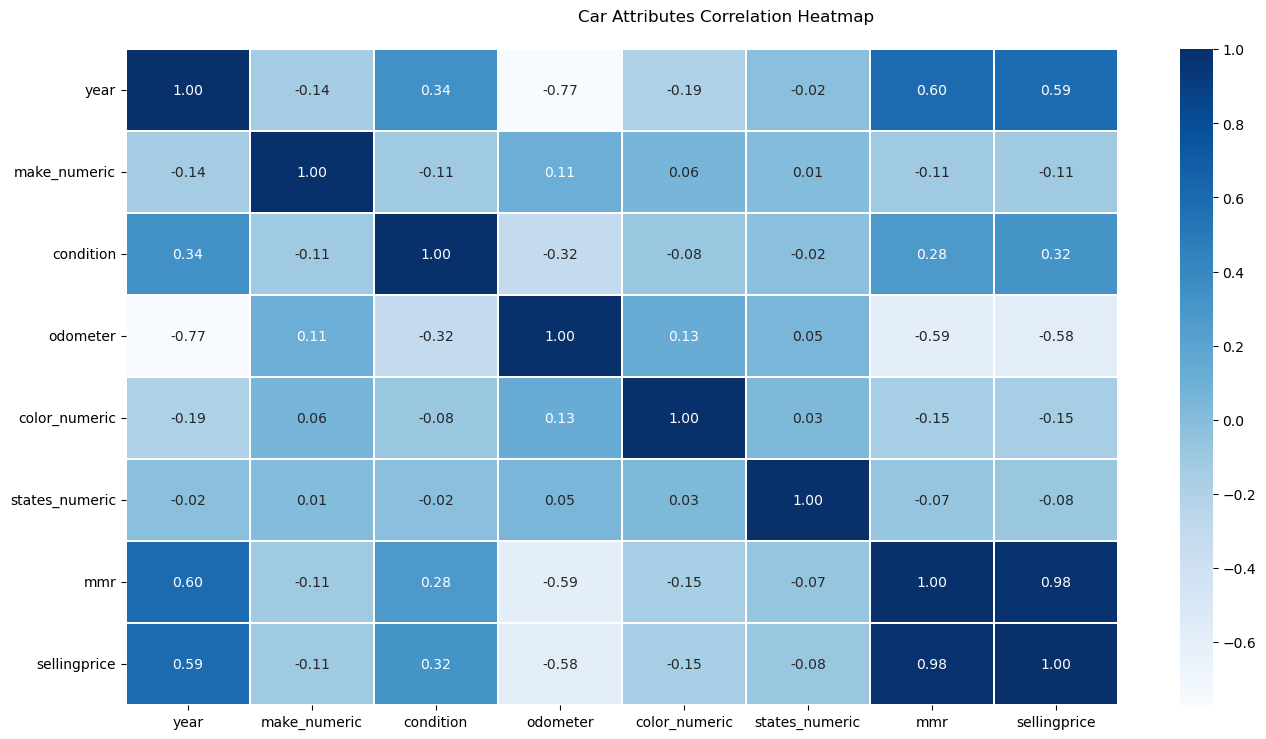

In [24]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(16, 8))
corr = cars.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Car Attributes Correlation Heatmap', fontsize=12)

c:\Users\diego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instea

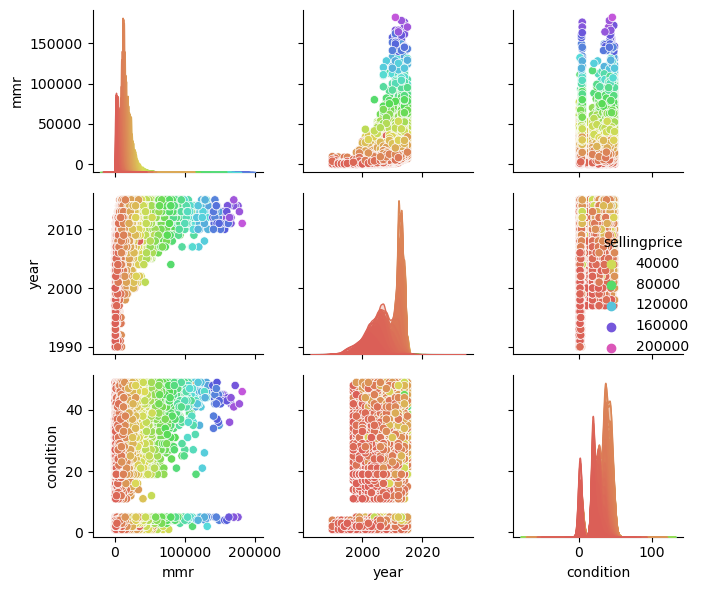

In [25]:
sns.pairplot( df.dropna(), vars=[ 'mmr', 'year','condition'], size=2, diag_kind='kde', palette='hls', hue='sellingprice' )
plt.tight_layout( )
plt.show()

In [26]:
# Importar las versiones de regresión de los modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Importaciones para el preprocesamiento y evaluación del modelo
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
carsCl = cars.copy()

#Hacemos una copia del dataframe

In [28]:
carsCl.head()

,year,make_numeric,condition,odometer,color_numeric,states_numeric,mmr,sellingprice
0,2015,1,5.0,16639.0,1.0,1,20500.0,21500.0
1,2015,1,5.0,9393.0,1.0,1,20800.0,21500.0
2,2014,2,45.0,1331.0,2.0,1,31900.0,30000.0
3,2015,3,41.0,14282.0,1.0,1,27500.0,27750.0
4,2014,2,43.0,2641.0,2.0,1,66000.0,67000.0


In [29]:
carsCl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make_numeric    558837 non-null  int64  
 2   condition       547017 non-null  float64
 3   odometer        558743 non-null  float64
 4   color_numeric   558837 non-null  float64
 5   states_numeric  558837 non-null  int64  
 6   mmr             558799 non-null  float64
 7   sellingprice    558825 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 34.1 MB


In [33]:
carsCl['condition'].to_csv("Dataset/condition_cars.csv",index = True)

In [32]:
carsCl['condition'].fillna(0)

0          5.0
1          5.0
2         45.0
3         41.0
4         43.0
          ... 
558832    45.0
558833     5.0
558834    48.0
558835    38.0
558836    34.0
Name: condition, Length: 558837, dtype: float64

In [34]:
carsCl['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: condition
Non-Null Count   Dtype  
--------------   -----  
547017 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB
